In [7]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# reward = pd.read_csv('maze.csv')
# reward_array = np.array(reward)
reward = pd.read_excel('maze_reward_table.xlsx', sheet_name="Sheet2", header=None)
# reward.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# reward.index = [1,2,3,4,5,6,7,8,9,10]
reward = np.array(reward)
terminals = [17,29,32,44,47,59,74,76,77,78,79,80,81,82,83,89,97,104,112,130,131,132,133,134,135]
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}

In [9]:
def select_action(current_state, current_pos, epsilon, Q):
    possible_actions = []
    if np.random.uniform() <= epsilon:
        if current_pos[0] != 0:
            possible_actions.append("up")
        if current_pos[0] != ny-1:
            possible_actions.append("down")
        if current_pos[1] != 0:
            possible_actions.append("left")
        if current_pos[1] != nx-1:
            possible_actions.append("right")
        action = actions[possible_actions[r(0,len(possible_actions)-1)]]
    else:
        m = np.min(Q[:,current_state])
        if current_pos[0] != 0: #up
            possible_actions.append(Q[0,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[0] != ny-1: #down
            possible_actions.append(Q[1,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != 0: #left
            possible_actions.append(Q[2,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != nx-1: #right
            possible_actions.append(Q[3,current_state])
        else:
            possible_actions.append(m - 100)
        action = random.choice([i for i,a in enumerate(possible_actions) if a == max(possible_actions)]) #randomly selecting one of all possible actions with maximin value
    return action

In [18]:
def episode(epsilon, gamma, eta, current_pos, Q):
    win_state = 147
    exit_flag = 0
    current_pos_temp = current_pos
    current_state = states[(current_pos[0],current_pos[1])]
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
    if new_state not in terminals:
        Q[action, current_state] += eta*(reward[current_pos[0],current_pos[1]] + gamma*(np.max(Q[:,new_state])) - Q[action,current_state])
        if new_state == win_state: exit_flag = 1
    else:
        Q[action, current_state] += eta*(reward[current_pos[0],current_pos[1]] - Q[action,current_state])
        exit_flag = 1
        
    return exit_flag, current_state

In [27]:
nx = 15
ny = 10
epsilon = 0.1 # Epsilon
eta = 0.1 # Learning Rate
gamma = 0.95 
Q = np.zeros((4,150)) # inititalise q table
current_pos = [0,0]
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}
states = {}
k=0
for i in range(ny):
    for j in range(nx):
        states[(i,j)] = k
        k+=1

run = True
counter = 0
iteration = 0
state_history = []
train_history = []
while run:
    train_counter = 0
    episode_flag = True
    while episode_flag:
        exit_flag, state = episode(epsilon, gamma, eta, current_pos, Q)
        if (exit_flag == 1): episode_flag = False
        train_counter += 1
        
    train_history.append(train_counter)
    current_pos = [0,0]
    counter += 1
    if (counter/1000) in ([1,2,3,4,5,6,7,8,9]): print('Episode ',counter,' complete')
    if (counter == 10000): run = False

Episode  1000  complete
Episode  2000  complete
Episode  3000  complete
Episode  4000  complete
Episode  5000  complete
Episode  6000  complete
Episode  7000  complete
Episode  8000  complete
Episode  9000  complete


In [28]:
episodes = list(range(len(train_history)))
data = pd.DataFrame(episodes)
data['train'] = train_history

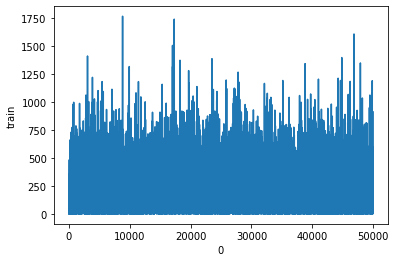

In [29]:
ax = sns.lineplot(x=0, y='train', data=data)

In [26]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.008176,-0.006604,-0.004739,-0.003944,-0.10000,-0.100,0.0,0.0,0.0,0.0
1,-0.01,-0.0195,-1.00,-0.0195,-0.0195,-0.0195,-0.0195,-0.0195,-0.0195,-0.0195,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.0,0.0,0.0,0.0
2,0.00,-0.0100,-0.01,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,...,-0.007941,-0.006513,-0.004686,-0.003439,-0.00271,-0.001,0.0,0.0,0.0,0.0
3,-0.01,-0.0100,-0.01,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,...,-0.007941,-0.006513,-0.005217,-0.004095,-0.00271,-0.001,0.1,0.0,0.0,0.0


In [34]:
data[9800:10000].mean()

0        9899.50
train      33.55
dtype: float64

In [52]:
current_pos = [0,0]
current_state = 0
state_history=[current_state]

def test_greedy(epsilon, gamma, eta, current_pos, Q):   
    win_state = 147
    win_flag = 0
    current_pos_temp = current_pos
    current_state = states[(current_pos[0],current_pos[1])]
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
    if new_state == win_state: win_flag = 1
    if new_state in terminals:
        current_pos = current_pos_temp

    return win_flag, new_state
    
    
train_counter = 0
episode_flag = True
epsilon = 0

while episode_flag:
    win_flag, state = test_greedy(epsilon, gamma, eta, current_pos, Q)
    state_history.append(state)
    if (win_flag == 1): episode_flag = False
    train_counter += 1
    if (train_counter == 1000): episode_flag = False


In [53]:
state_history

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 26,
 41,
 40,
 55,
 70,
 85,
 84,
 99,
 98,
 113,
 128,
 143,
 144,
 145,
 146,
 147]

In [45]:
test

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 27,
 42,
 57,
 72,
 87,
 102,
 117,
 116,
 115,
 114,
 113,
 128,
 143,
 144,
 145,
 146,
 147]